In [16]:
# !pip install scikit-learn

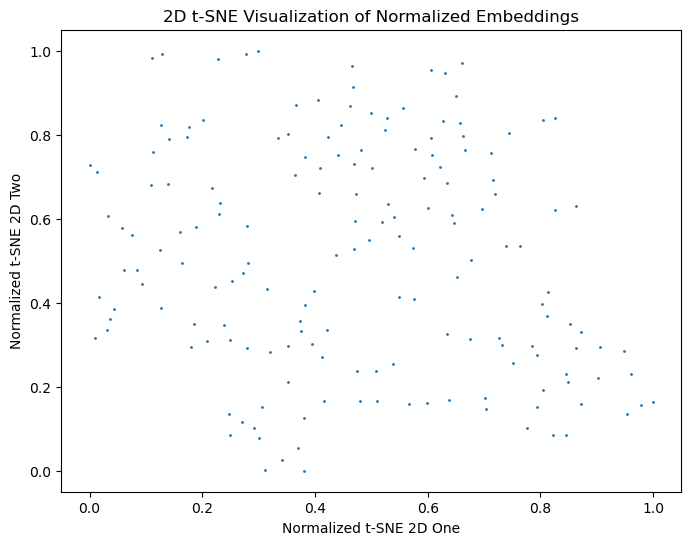

In [14]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_json("https://github.com/do-me/SDG-Analyzer/raw/main/assets/SDG_Target_2023_jina_base.json.gz")

# Assuming 'jina-embeddings-v2-base-en' holds your embeddings
embeddings = np.stack(df['jina-embeddings-v2-base-en'].values)

# Initialize t-SNE with two components (2D)
tsne = TSNE(n_components=2, perplexity=10, n_iter=10000, random_state=42)

# Fit and transform your embeddings
tsne_results = tsne.fit_transform(embeddings)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the t-SNE results
tsne_normalized = scaler.fit_transform(tsne_results)

# Add the normalized 2D coordinates back to your DataFrame
df['x_norm'] = tsne_normalized[:,0]
df['y'] = tsne_normalized[:,1]

# Now you can plot the normalized results using matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(df['x_norm'], df['y'], s=1)  # You can also color the points by some label using the `c` argument
plt.xlabel('Normalized t-SNE 2D One')
plt.ylabel('Normalized t-SNE 2D Two')
plt.title('2D t-SNE Visualization of Normalized Embeddings')
plt.show()

In [13]:
df

,SDGNumber,SDGTitle,TargetsNumber,Targets,jina-embeddings-v2-base-en,x_norm,y_norm
0,1,No Poverty,1.1,"By 2030, eradicate extreme poverty for all pe...","[0.013646188200000001, -0.8851571083, 0.273902...",0.474702,0.237202
1,1,No Poverty,1.2,"By 2030, reduce at least by half the proporti...","[-0.5175303221, -0.1017927676, 0.1907873154000...",0.508123,0.238149
2,1,No Poverty,1.3,Implement nationally appropriate social prote...,"[-0.0685161054, -0.188393563, 0.4002646804, 0....",0.702829,0.147774
3,1,No Poverty,1.4,"By 2030, ensure that all men and women, in pa...","[-4.54066e-05, -0.1530471444, 0.4292953908, 0....",0.849568,0.211390
4,1,No Poverty,1.5,"By 2030, build the resilience of the poor and...","[-0.32836982610000004, -0.5124217868000001, 0....",0.280105,0.292581
...,...,...,...,...,...,...,...
164,17,Partnerships for the Goals,17.15,Respect each country’s policy space and leade...,"[-0.0687223226, -0.2726017833, 0.9761043191000...",0.764401,0.534448
165,17,Partnerships for the Goals,17.16,Enhance the Global Partnership for Sustainabl...,"[-0.3509787023, -0.0232130904, 0.8275802135, 0...",0.540611,0.603604
166,17,Partnerships for the Goals,17.17,"Encourage and promote effective public, publi...","[-0.2692470551, 0.1061384082, 0.93294286730000...",0.825518,0.620819
167,17,Partnerships for the Goals,17.18,"By 2020, enhance capacity-building support to...","[-0.28500363230000003, -0.2784230411, 0.434557...",0.606899,0.750743


In [15]:
df.to_parquet("SDGs.parquet")